# Parnan Taheri - 99106352
## Deep Learning
### Homework 3 - Q1


In [25]:
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Part A

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_size = 40000
val_size = 10000

train_data, val_data = random_split(train_dataset, [train_size, val_size])

100%|██████████| 170M/170M [00:13<00:00, 13.1MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


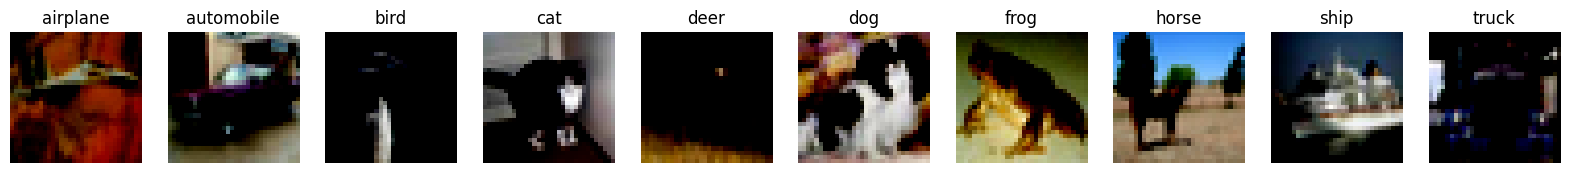

In [3]:
classes = train_dataset.classes
num_classes = len(classes)
fig, axes = plt.subplots(1, num_classes, figsize=(20, 4))
for i, class_name in enumerate(classes):
    idxs = np.where(np.array(train_dataset.targets) == i)[0]

    random_idx = np.random.choice(idxs)

    img, label = train_dataset[random_idx]

    ax = axes[i]
    ax.imshow(img.permute(1, 2, 0))
    ax.set_title(class_name)
    ax.axis('off')
plt.show()

## Part B

In [4]:
batch_size = 64

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [29]:
class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten  = nn.Flatten()
        self.fc = nn.Linear(32 * 14 * 14, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

baseline_model = BaselineModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(baseline_model.parameters(), lr=0.001, momentum=0.9)

Epoch 1/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 59.24batch/s]


Epoch [1/30]
Training Loss: 1.3653, Training Accuracy: 52.63%
Validation Loss: 1.3419, Validation Accuracy: 53.20%


Epoch 2/30 - Validation: 100%|██████████| 157/157 [00:03<00:00, 47.57batch/s]


Epoch [2/30]
Training Loss: 1.2822, Training Accuracy: 55.66%
Validation Loss: 1.2854, Validation Accuracy: 55.28%


Epoch 3/30 - Validation: 100%|██████████| 157/157 [00:03<00:00, 41.27batch/s]


Epoch [3/30]
Training Loss: 1.2283, Training Accuracy: 57.53%
Validation Loss: 1.2366, Validation Accuracy: 56.80%


Epoch 4/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 61.29batch/s]


Epoch [4/30]
Training Loss: 1.1804, Training Accuracy: 59.40%
Validation Loss: 1.2152, Validation Accuracy: 57.30%


Epoch 5/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 62.47batch/s]


Epoch [5/30]
Training Loss: 1.1380, Training Accuracy: 60.91%
Validation Loss: 1.1817, Validation Accuracy: 58.75%


Epoch 6/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 59.93batch/s]


Epoch [6/30]
Training Loss: 1.1026, Training Accuracy: 62.20%
Validation Loss: 1.1509, Validation Accuracy: 60.69%


Epoch 7/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 53.34batch/s]


Epoch [7/30]
Training Loss: 1.0687, Training Accuracy: 63.44%
Validation Loss: 1.1309, Validation Accuracy: 60.77%


Epoch 8/30 - Validation: 100%|██████████| 157/157 [00:03<00:00, 50.40batch/s]


Epoch [8/30]
Training Loss: 1.0388, Training Accuracy: 64.49%
Validation Loss: 1.1203, Validation Accuracy: 61.69%


Epoch 9/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 61.55batch/s]


Epoch [9/30]
Training Loss: 1.0131, Training Accuracy: 65.25%
Validation Loss: 1.0936, Validation Accuracy: 62.16%


Epoch 10/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 60.27batch/s]


Epoch [10/30]
Training Loss: 0.9885, Training Accuracy: 66.20%
Validation Loss: 1.0962, Validation Accuracy: 62.57%


Epoch 11/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 56.23batch/s]


Epoch [11/30]
Training Loss: 0.9691, Training Accuracy: 66.89%
Validation Loss: 1.0653, Validation Accuracy: 63.49%


Epoch 12/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 59.84batch/s]


Epoch [12/30]
Training Loss: 0.9515, Training Accuracy: 67.52%
Validation Loss: 1.0507, Validation Accuracy: 64.22%


Epoch 13/30 - Validation: 100%|██████████| 157/157 [00:03<00:00, 43.88batch/s]


Epoch [13/30]
Training Loss: 0.9354, Training Accuracy: 67.95%
Validation Loss: 1.0586, Validation Accuracy: 63.53%


Epoch 14/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 60.46batch/s]


Epoch [14/30]
Training Loss: 0.9204, Training Accuracy: 68.62%
Validation Loss: 1.0589, Validation Accuracy: 63.95%


Epoch 15/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 60.28batch/s]


Epoch [15/30]
Training Loss: 0.9067, Training Accuracy: 69.14%
Validation Loss: 1.0472, Validation Accuracy: 64.28%


Epoch 16/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 58.98batch/s]


Epoch [16/30]
Training Loss: 0.8908, Training Accuracy: 69.54%
Validation Loss: 1.0401, Validation Accuracy: 64.62%


Epoch 17/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 59.62batch/s]


Epoch [17/30]
Training Loss: 0.8806, Training Accuracy: 70.06%
Validation Loss: 1.0289, Validation Accuracy: 64.76%


Epoch 18/30 - Validation: 100%|██████████| 157/157 [00:03<00:00, 45.25batch/s]


Epoch [18/30]
Training Loss: 0.8690, Training Accuracy: 70.34%
Validation Loss: 1.0346, Validation Accuracy: 64.26%


Epoch 19/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 59.48batch/s]


Epoch [19/30]
Training Loss: 0.8577, Training Accuracy: 70.72%
Validation Loss: 1.0221, Validation Accuracy: 65.08%


Epoch 20/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 61.94batch/s]


Epoch [20/30]
Training Loss: 0.8476, Training Accuracy: 71.09%
Validation Loss: 1.0262, Validation Accuracy: 65.23%


Epoch 21/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 62.42batch/s]


Epoch [21/30]
Training Loss: 0.8359, Training Accuracy: 71.45%
Validation Loss: 1.0251, Validation Accuracy: 65.19%


Epoch 22/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 62.56batch/s]


Epoch [22/30]
Training Loss: 0.8276, Training Accuracy: 71.84%
Validation Loss: 1.0090, Validation Accuracy: 65.41%


Epoch 23/30 - Validation: 100%|██████████| 157/157 [00:03<00:00, 52.28batch/s]


Epoch [23/30]
Training Loss: 0.8140, Training Accuracy: 72.54%
Validation Loss: 1.0409, Validation Accuracy: 64.58%


Epoch 24/30 - Validation: 100%|██████████| 157/157 [00:03<00:00, 49.80batch/s]


Epoch [24/30]
Training Loss: 0.8049, Training Accuracy: 72.38%
Validation Loss: 1.0158, Validation Accuracy: 65.48%


Epoch 25/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 60.32batch/s]


Epoch [25/30]
Training Loss: 0.7968, Training Accuracy: 72.85%
Validation Loss: 1.0264, Validation Accuracy: 64.90%


Epoch 26/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 61.50batch/s]


Epoch [26/30]
Training Loss: 0.7883, Training Accuracy: 73.15%
Validation Loss: 1.0114, Validation Accuracy: 65.89%


Epoch 27/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 61.17batch/s]


Epoch [27/30]
Training Loss: 0.7779, Training Accuracy: 73.42%
Validation Loss: 1.0352, Validation Accuracy: 64.76%


Epoch 28/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 60.12batch/s]


Epoch [28/30]
Training Loss: 0.7718, Training Accuracy: 73.77%
Validation Loss: 1.0098, Validation Accuracy: 66.12%


Epoch 29/30 - Validation: 100%|██████████| 157/157 [00:03<00:00, 46.02batch/s]


Epoch [29/30]
Training Loss: 0.7636, Training Accuracy: 74.04%
Validation Loss: 1.0216, Validation Accuracy: 65.23%


Epoch 30/30 - Validation: 100%|██████████| 157/157 [00:02<00:00, 60.05batch/s]


Epoch [30/30]
Training Loss: 0.7555, Training Accuracy: 74.25%
Validation Loss: 1.0214, Validation Accuracy: 65.50%


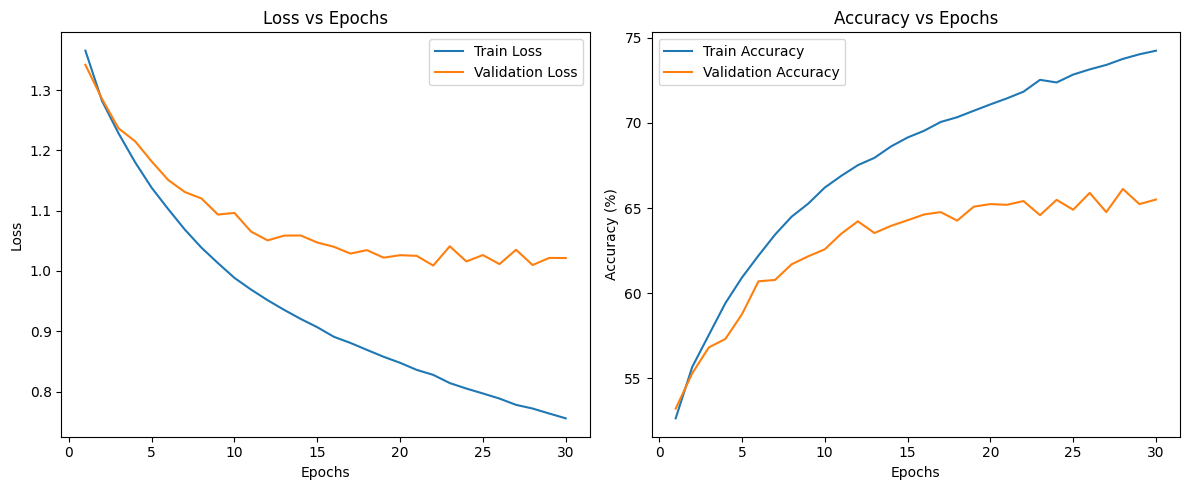

In [ ]:
# Training the model
num_epochs = 30
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

best_val_loss = 10000
best_model = None

for epoch in range(num_epochs):
    baseline_model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    with tqdm(train_loader, unit="batch", desc=f"Epoch {epoch+1}/{num_epochs} - Training") as train_bar:
        for inputs, labels in train_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = baseline_model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train

    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # Validation loop
    baseline_model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        with tqdm(val_loader, unit="batch", desc=f"Epoch {epoch+1}/{num_epochs} - Validation") as val_bar:
            for inputs, labels in val_bar:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = baseline_model(inputs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

    avg_val_loss = running_val_loss / len(val_loader)
    val_accuracy = 100 * correct_val / total_val

    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%")
    print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model = baseline_model.state_dict()

epochs = range(1, num_epochs + 1)

# Plotting Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Save the best model
torch.save(best_model, 'best_baseline_model.pth')

## Part C

In [5]:

class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.pool(self.relu(self.conv4(x)))
        x = x.view(-1, 256 * 4 * 4)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class Model4(nn.Module):
    def __init__(self):
        super(Model4, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = self.fc1(x)
        return x


In [11]:
def train_model(models, model_names, num_epochs):
    criterion = nn.CrossEntropyLoss()
    for model, name in zip(models, model_names):
        print(f"Training {name}...")
        model = model.to(device)
        optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []

        best_val_loss = 10000
        best_model = None

        for epoch in range(num_epochs):
            model.train()
            running_loss = 0.0
            correct_train = 0
            total_train = 0

            with tqdm(train_loader, unit="batch", desc=f"Epoch {epoch+1}/{num_epochs} - Training") as train_bar:
                for inputs, labels in train_bar:
                    inputs, labels = inputs.to(device), labels.to(device)
                    optimizer.zero_grad()
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()

                    running_loss += loss.item()
                    _, predicted = torch.max(outputs, 1)
                    total_train += labels.size(0)
                    correct_train += (predicted == labels).sum().item()

                    train_bar.set_postfix(loss=running_loss / (train_bar.n + 1), accuracy=100 * correct_train / total_train)

            avg_train_loss = running_loss / len(train_loader)
            train_accuracy = 100 * correct_train / total_train
            train_losses.append(avg_train_loss)
            train_accuracies.append(train_accuracy)

            # Validation loop
            model.eval()
            running_val_loss = 0.0
            correct_val = 0
            total_val = 0

            with torch.no_grad():
                with tqdm(val_loader, unit="batch", desc=f"Epoch {epoch+1}/{num_epochs} - Validation") as val_bar:
                    for inputs, labels in val_bar:
                        inputs, labels = inputs.to(device), labels.to(device)
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        running_val_loss += loss.item()
                        _, predicted = torch.max(outputs, 1)
                        total_val += labels.size(0)
                        correct_val += (predicted == labels).sum().item()

                        val_bar.set_postfix(loss=running_val_loss / (val_bar.n + 1), accuracy=100 * correct_val / total_val)

            avg_val_loss = running_val_loss / len(val_loader)
            val_accuracy = 100 * correct_val / total_val
            val_losses.append(avg_val_loss)
            val_accuracies.append(val_accuracy)

            # print(f"Epoch [{epoch+1}/{num_epochs}]")
            # print(f"Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%")
            # print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                best_model = model.state_dict()

        # Save best model for comparison
        torch.save(best_model, f'best_{name}.pth')

        # Plot
        epochs = range(1, num_epochs + 1)
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(epochs, train_losses, label='Train Loss')
        plt.plot(epochs, val_losses, label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'{name} - Loss vs Epochs')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(epochs, train_accuracies, label='Train Accuracy')
        plt.plot(epochs, val_accuracies, label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy (%)')
        plt.title(f'{name} - Accuracy vs Epochs')
        plt.legend()

        plt.tight_layout()
        plt.show()

Training Model1...


Epoch 30/30 - Validation: 100%|██████████| 157/157 [00:04<00:00, 37.83batch/s, accuracy=70.5, loss=1.1]


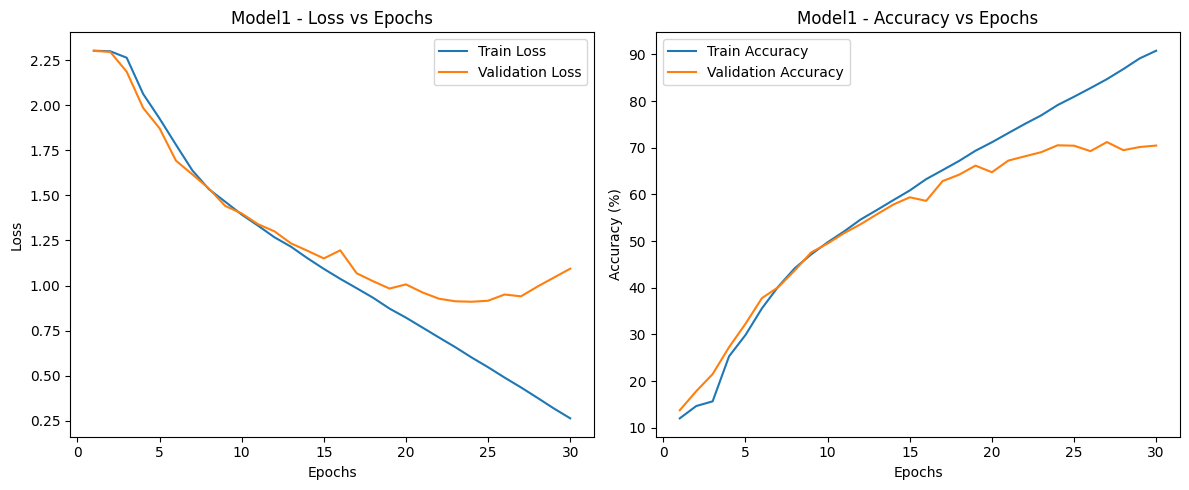

In [14]:
models = [Model1()]
model_names = ['Model1']
num_epochs = 30

train_model(models, model_names, num_epochs)

Training Model2...


Epoch 30/30 - Validation: 100%|██████████| 157/157 [00:03<00:00, 47.64batch/s, accuracy=70.9, loss=0.907]


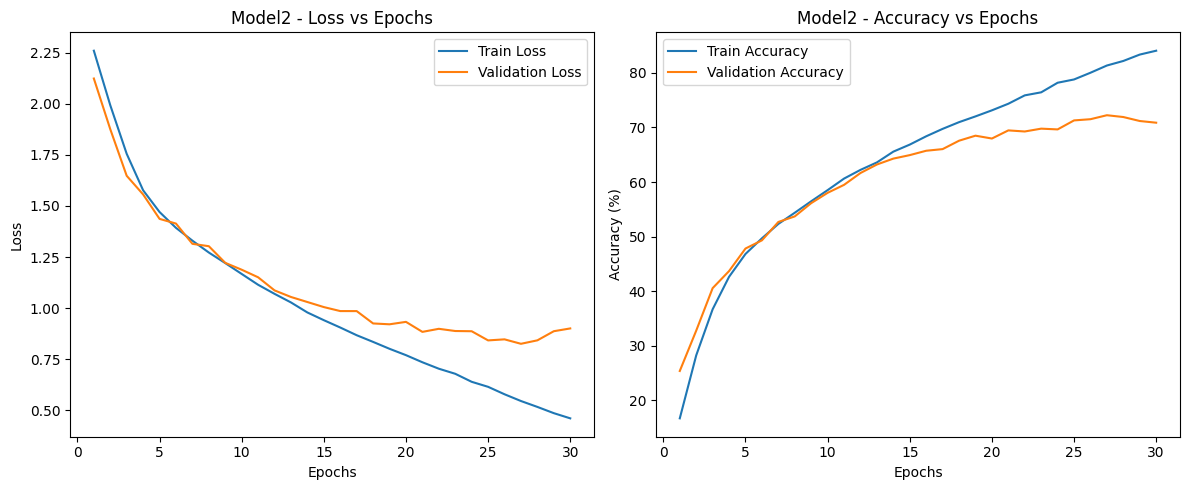

In [15]:
models = [Model2()]
model_names = ['Model2']
num_epochs = 30
train_model(models, model_names, num_epochs)

Training Model3...


Epoch 30/30 - Validation: 100%|██████████| 157/157 [00:04<00:00, 39.24batch/s, accuracy=69.1, loss=1.05]


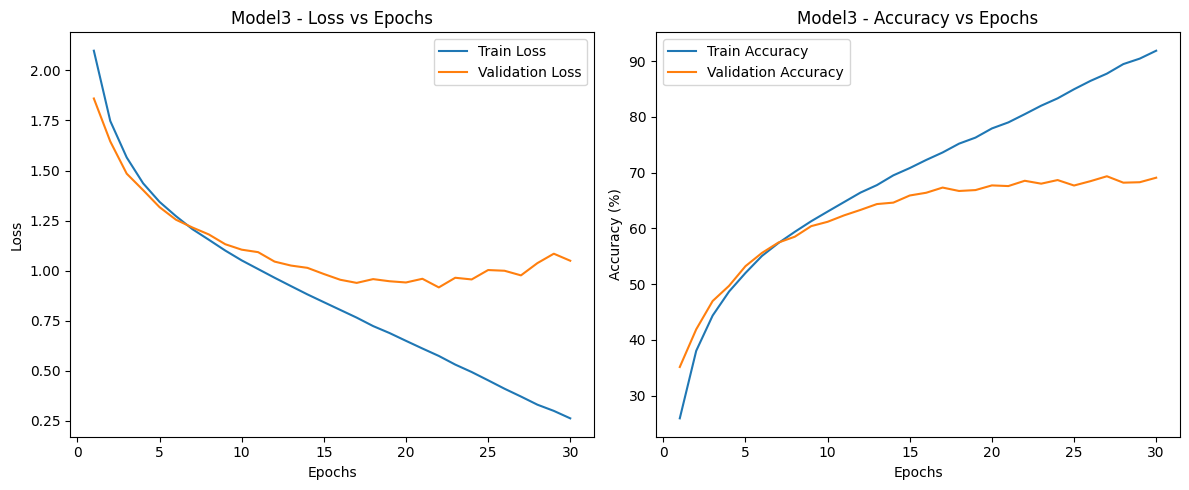

In [7]:
models = [Model3()]
model_names = ['Model3']
num_epochs = 30
train_model(models, model_names, num_epochs)

Training Model4...


Epoch 30/30 - Validation: 100%|██████████| 157/157 [00:03<00:00, 45.45batch/s, accuracy=69.2, loss=0.926]


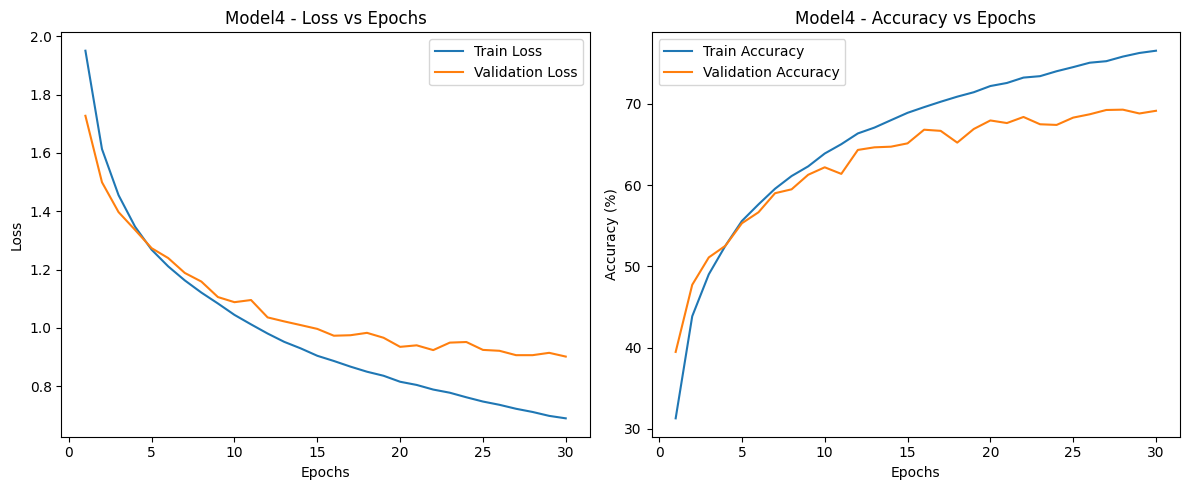

In [12]:
models = [Model4()]
model_names = ['Model4']
num_epochs = 30
train_model(models, model_names, num_epochs)

## Part D

If we pay attention to the loss curves, we can see that the best model is the second one. The First and third one is overfitted and the fourth one could not be trained in 30 epoches and it's accuracy is too low. Therefore, I choose the 2nd one with 3 convs and 2 FC layers.

In [13]:
class Model2BN(nn.Module):
    def __init__(self):
        super(Model2BN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


Training Model2BN...


Epoch 30/30 - Validation: 100%|██████████| 157/157 [00:04<00:00, 37.15batch/s, accuracy=74.6, loss=1.15]


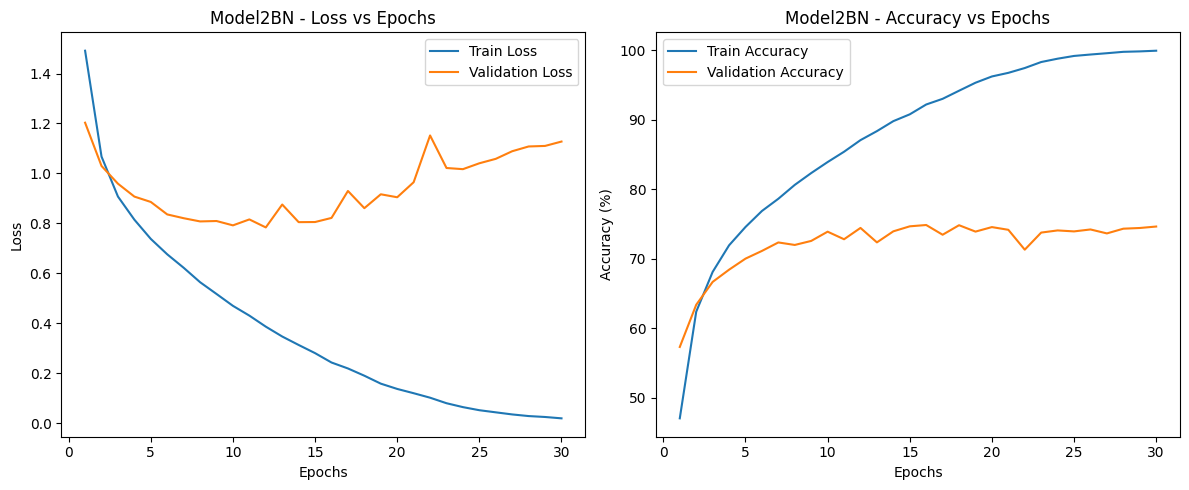

In [24]:
models = [Model2BN()]
model_names = ['Model2BN']
num_epochs = 30
train_model(models, model_names, num_epochs)

It reaches faster to it's maximum but is prone to overfitting.


## Part E

In [22]:
class Model2BN_Dropout(nn.Module):
    def __init__(self):
        super(Model2BN_Dropout, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.bn1(self.conv1(x))))
        x = self.pool(nn.functional.relu(self.bn2(self.conv2(x))))
        x = self.pool(nn.functional.relu(self.bn3(self.conv3(x))))
        x = x.view(-1, 128 * 4 * 4)
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return x

Training Model2BN_Dropout...


Epoch 30/30 - Validation: 100%|██████████| 157/157 [00:04<00:00, 37.75batch/s, accuracy=77.3, loss=0.791]


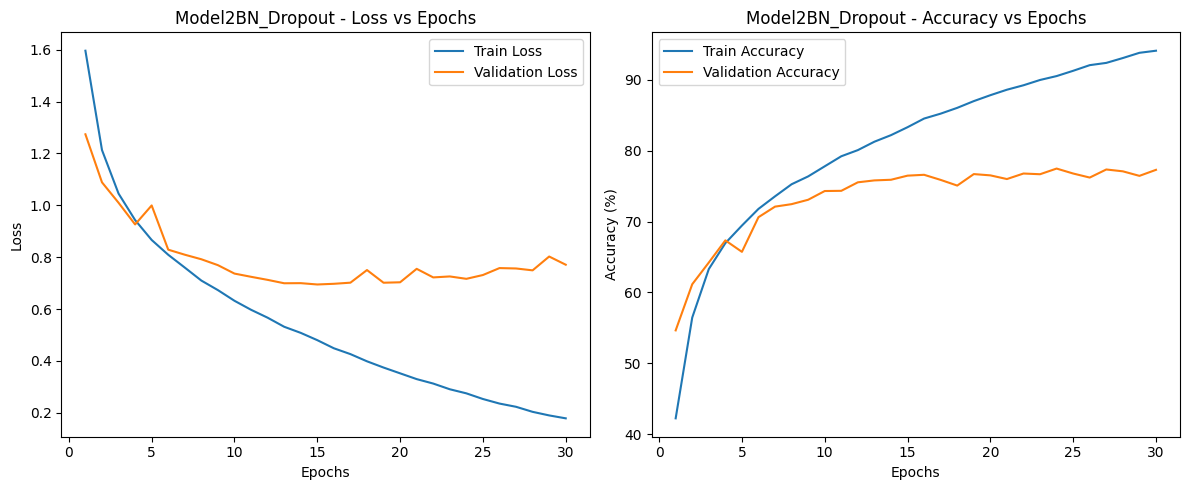

In [23]:
models = [Model2BN_Dropout()]
model_names = ['Model2BN_Dropout']
num_epochs = 30
train_model(models, model_names, num_epochs)

We can see from the validation loss that it does not overfit and the accuracy is higher.

## Part F

In [37]:
def test_model(model, model_name):
    model.load_state_dict(torch.load(f'best_{model_name}.pth'))
    model.to(device)
    model.eval()

    all_predictions = []
    all_labels = []
    with torch.no_grad():
        with tqdm(test_loader, unit="batch", desc=f"Testing {model_name}") as test_bar:
            for inputs, labels in test_bar:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                all_predictions.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

    accuracy = np.mean(np.array(all_predictions) == np.array(all_labels))
    print(f"Test Accuracy for {model_name}: {accuracy * 100:.2f}%")

    confusion_matrix = confusion_matrix(all_labels, all_predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

<ipython-input-26-84590e5650d7>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_{model_name}.pth'))
Testing baseline_model: 100%|███

Test Accuracy for baseline_model: 64.84%


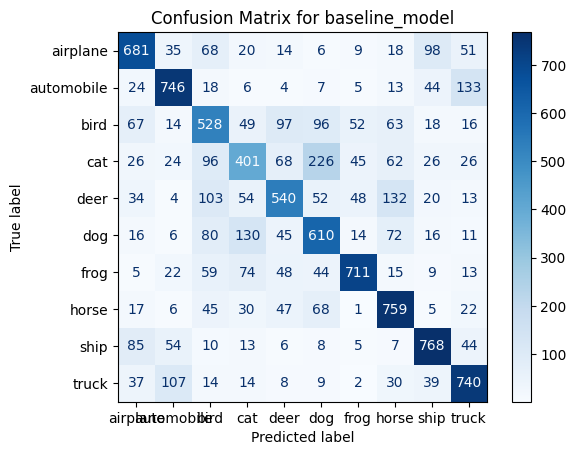

In [31]:
model = BaselineModel()
model_name =  "baseline_model"
test_model(model, model_name)

<ipython-input-26-84590e5650d7>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_{model_name}.pth'))
Testing Model2: 100%|██████████|

Test Accuracy for Model2: 70.52%


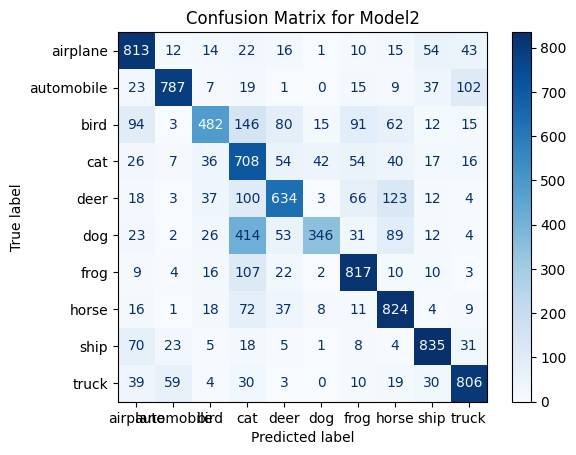

In [32]:
model = Model2()
model_name =  "Model2"
test_model(model, model_name)

<ipython-input-26-84590e5650d7>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_{model_name}.pth'))
Testing Model2BN: 100%|█████████

Test Accuracy for Model2BN: 75.22%


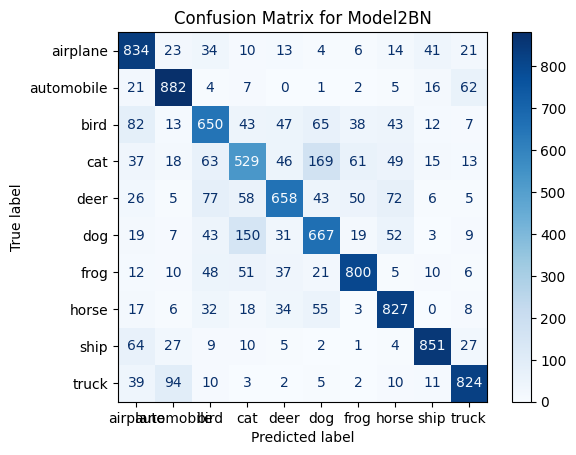

In [33]:
model = Model2BN()
model_name =  "Model2BN"
test_model(model, model_name)

<ipython-input-26-84590e5650d7>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_{model_name}.pth'))
Testing Model2BN_Dropout: 100%|█

Test Accuracy for Model2BN_Dropout: 77.42%


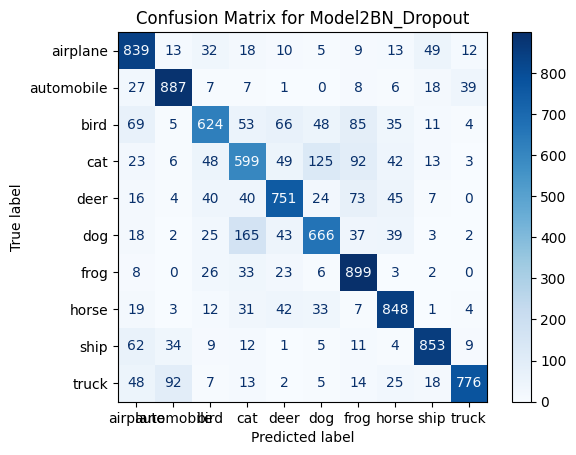

In [35]:
model = Model2BN_Dropout()
model_name =  "Model2BN_Dropout"
test_model(model, model_name)